In [1]:
import pandas as pd
# Taken & PCA
# raw_df = pd.read_csv('./features_data_resample/HRV_Takens&pca.csv')
# raw_label = pd.read_csv('./features_data_resample/HRV_Takens&pca_label.csv')

# Original featuers
#raw_df = pd.read_csv('./features_data_resample/HRV_Original.csv')
#raw_label = pd.read_csv('./features_data_resample/HRV_Original_label.csv')

# HRV+localPHI
raw_df = pd.read_csv('./features_data_resample/HRV_all.csv')
raw_label = pd.read_csv('./features_data_resample/HRV_all_label.csv')
subject_id = pd.read_csv('./features_data_resample/subjectId.csv')
X = raw_df
y = raw_label
print(y.shape,X.shape, subject_id.shape)

(10057, 1) (10057, 239) (10057, 1)


In [2]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import numpy as np
def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()
    return confusion_matrix

def cal_confmatrix(n_range,y_true,y_pred):
    cm  = np.zeros([n_range,n_range])
    for i in range(1,n_range+1):
        for j in range(1,n_range+1):
            cm[i-1,j-1] += sum((y_true == i) & (y_pred == j))
    return cm



In [4]:
N = int(subject_id.max())
CM = np.zeros([4,4])
for i in range(1,N+1):
    sub_id = (subject_id['1'] == i) # The ['1'] is to select first column so that the range will be a series not df
    X_test = X[sub_id]
    X_train = X[~sub_id]
    y_test = y[sub_id].values.flatten() # The Model expect 1d array
    y_train = y[~sub_id].values.flatten()
    model = lgb.LGBMClassifier(is_unbalance=False)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, pred))
    CM += cal_confmatrix(4 ,y_test,pred)

Accuracy: 0.39037433155080214
Accuracy: 0.2962962962962963
Accuracy: 0.44612068965517243
Accuracy: 0.5066225165562914
Accuracy: 0.71875
Accuracy: 0.5505050505050505
Accuracy: 0.46568627450980393
Accuracy: 0.6363636363636364
Accuracy: 0.49776785714285715
Accuracy: 0.7291666666666666
Accuracy: 0.37966101694915255
Accuracy: 0.42138364779874216
Accuracy: 0.43866171003717475
Accuracy: 0.5689149560117303
Accuracy: 0.6137566137566137
Accuracy: 0.49056603773584906
Accuracy: 0.5253623188405797
Accuracy: 0.68
Accuracy: 0.6666666666666666
Accuracy: 0.659919028340081
Accuracy: 0.5193798449612403
Accuracy: 0.48148148148148145
Accuracy: 0.38315217391304346
Accuracy: 0.5761589403973509
Accuracy: 0.3380035026269702
Accuracy: 0.5410628019323671
Accuracy: 0.4758454106280193
Accuracy: 0.5988700564971752
Accuracy: 0.14935822637106183
Accuracy: 0.38950276243093923


In [5]:
print('Acc = ', sum(np.diag(CM))/sum(sum(CM)))
stat = np.zeros([3,4])
for i in range(4):
    stat[0,i] = CM[i,i]/sum(CM[:,i])
    stat[1,i] = CM[i,i]/sum(CM[i,:])
    stat[2,i] = 2*stat[0,i]*stat[1,i]/(stat[0,i]+stat[1,i])
    
macroF1 = sum(stat[2,:])/4
print('macroF1 = ', macroF1)

Acc =  0.4585860594610719
macroF1 =  0.40485056293047383


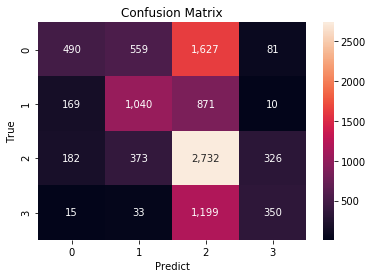

In [6]:
plot = sns.heatmap(CM, annot=True, fmt=',.0f')
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
np.transpose(stat)

array([[0.57242991, 0.17772942, 0.27124273],
       [0.51870324, 0.49760766, 0.50793651],
       [0.42494945, 0.75615832, 0.54411472],
       [0.45632334, 0.21916093, 0.29610829]])

# Original Code

In [8]:
# # Leave-one-out cross validation cutting
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# print('X_train:', X_train.shape)
# print('X_test:', X_test.shape)

In [9]:
# import lightgbm as lgb
# model = lgb.LGBMClassifier(is_unbalance=True)
# model.fit(X_train,y_train)

In [10]:
# from sklearn.metrics import accuracy_score
# pred=model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, pred))

In [11]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# def plot_confusion_matrix(actual_val, pred_val, title=None):
    # confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   # rownames=['Actual'],
                                   # colnames=['Predicted'])
    
    # plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    # if title is None:
        # pass
    # else:
        # plot.set_title(title)
        
    # plt.show()
    # return confusion_matrix

In [12]:
# import numpy as np
# q = np.array(y_test)
# q = q.reshape((-1,))
# print(q.shape)
# print(pred.shape)

In [13]:
# plot_confusion_matrix(q, pred)